Original Image Shape: (495, 930, 3)
Upscaled Image Shape: (495, 930, 3)
SSIM Value: 0.5791


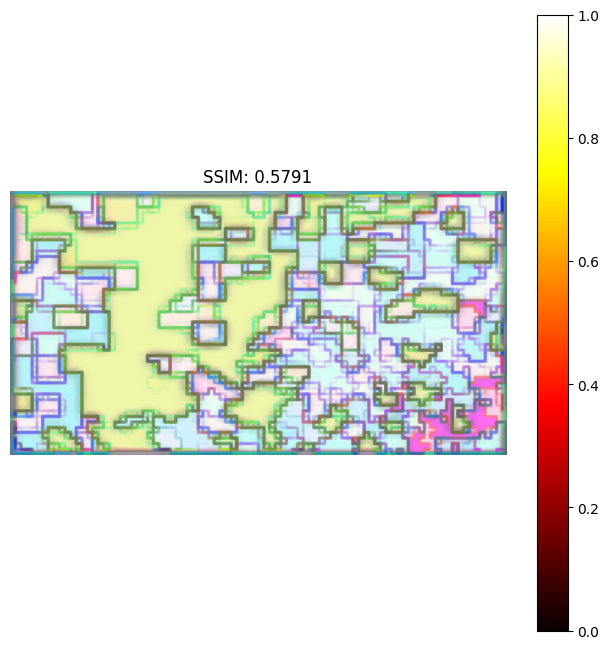

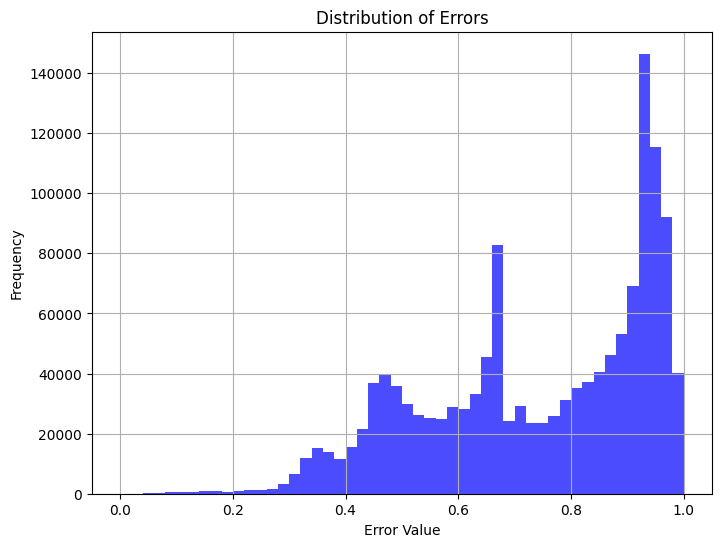

In [1]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def calculate_ssim_and_error(original_image_path, upscaled_image_path):
    try:
        original_image = np.array(Image.open(original_image_path).convert('RGB'))
        upscaled_image = np.array(Image.open(upscaled_image_path).convert('RGB'))
    except Exception as e:
        print(f"Error loading images: {e}")
        return

    print(f"Original Image Shape: {original_image.shape}")
    print(f"Upscaled Image Shape: {upscaled_image.shape}")

    if original_image.shape != upscaled_image.shape:
        raise ValueError("Original and upscaled images must have the same dimensions.")
    
    ssim_value, error_map = ssim(original_image, upscaled_image, channel_axis=-1, full=True)

    print(f"SSIM Value: {ssim_value:.4f}")

    error_map = np.nan_to_num(error_map, nan=0.0)

    error_map = (error_map - error_map.min()) / (error_map.max() - error_map.min())

    #Plot the error map
    plt.figure(figsize=(8, 8))
    plt.imshow(error_map, cmap='hot', vmin=0, vmax=1)
    plt.title(f"SSIM: {ssim_value:.4f}")
    plt.colorbar()
    plt.axis('off')
    plt.show()

    # Plot the distribution of errors
    plt.figure(figsize=(8, 6))
    plt.hist(error_map.ravel(), bins=50, color='blue', alpha=0.7)
    plt.title("Distribution of Errors")
    plt.xlabel("Error Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Chnage based on where storing original image and output image
calculate_ssim_and_error("original_image.png", "upscaled_image_resized.png")